In [2]:
import numpy as np
import pandas as pd
from pandas import read_csv
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt


In [3]:
# inicializamos la semilla para generar numeros aleatorios
seed=np.random.seed(0)


# cargamos el dataset
url= "https://www.openml.org/data/get_csv/61/dataset_61_iris.arff"
ds=read_csv(url)

RF: -0.039146 (0.011981)
KNN: -0.034783 (0.011229)
BR: -0.035150 (0.018136)
SVR: -0.036951 (0.020944)
MLP: -0.605385 (0.097871)


C:\Users\ferna\AppData\Local\Temp\ipykernel_30220\220159899.py:31: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(results, labels=names)


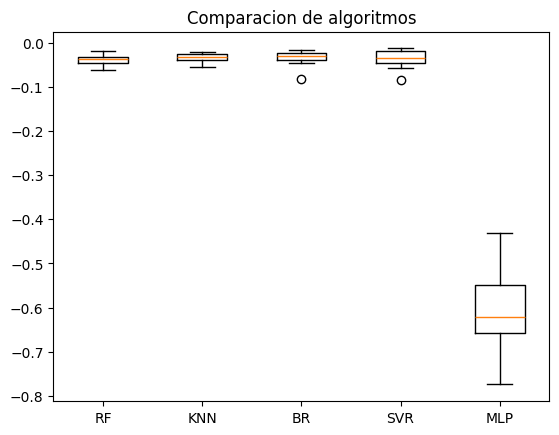

In [4]:
# Supongamos que ds es un DataFrame de pandas que contiene el dataset
array = ds.values
x = array[:, 0:3]
y = array[:, 3]

# Dividimos el dataset en 80% para entrenar y 20% para testear
x_train, x_validation, y_train, y_validation = train_test_split(x, y, test_size=0.2, random_state=1, shuffle=True)

# cargamos algoritmos
models = []
seed = 1

models.append(("RF", RandomForestRegressor(n_jobs=2, random_state=seed)))
models.append(("KNN", KNeighborsRegressor()))
models.append(("BR", BayesianRidge()))
models.append(("SVR", SVR(gamma='auto')))
models.append(("MLP", MLPRegressor(activation="relu", alpha=1e-05, batch_size="auto", beta_2=0.999, early_stopping=False, epsilon=1e-08, hidden_layer_sizes=(3, 3), learning_rate="constant", learning_rate_init=0.001, max_iter=200, momentum=0.9, nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True, solver="lbfgs", tol=0.0001, validation_fraction=0.1, verbose=False, warm_start=False)))

# evaluamos cada modelo por turnos
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

# comprobacion de algoritmos
plt.boxplot(results, labels=names)
plt.title('Comparacion de algoritmos')
plt.show()